# Proyek Analisis Data: dashboard_bike_sharing
Nama: Kang, Andini Wulandari

Email: m007d4kx1517@bangkit.academy

ID Dicoding: kangandiniw

## Menentukan Pertanyaan Bisnis


- Pertanyaan 1 :

Bagaimana distribusi jumlah sewa sepeda berdasarkan hari kerja dan hari libur selama bulan November - Desember tahun 2012?

- Pertanyaan 2 :

Bagaimana tingkat kelembaban mempengaruhi jumlah sewa sepeda selama musim dingin?

- Pertanyaan 3 :

Apa hubungan cuaca dengan jumlah pengguna yang terdaftar?

- Pertanyaan 4 :
Berapa jumlah total sewa sepeda untuk tahun 2012 selama musim gugur dan dingin?

## Import Semua Packages/Library yang Digunakan

In [2]:
!pip install numpy pandas scipy matplotlib seaborn jupyter streamlit babel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.0 MB/s eta 0:00:00


In [3]:
# Library
import pandas as pd
!pip install plotly
import plotly.express as px

import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency

## Data Wrangling

### Gathering Data

In [4]:
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

In [5]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [7]:
print('DataFrame day:')
print(df_day.info())

print('\nDataFrame hour:')
print(df_hour.info())

DataFrame day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

DataFrame hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 

### Cleaning Data

In [8]:
print('DataFrame Day:')
print(df_day.isna().sum())

print('\nDataFrame Hour:')
print(df_hour.isna().sum())

DataFrame Day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

DataFrame Hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Duplicate Data

In [9]:
print('DataFrame day:', df_day.duplicated().sum())
print("DataFrame hour:", df_hour.duplicated().sum())

DataFrame day: 0
DataFrame hour: 0


### Deskripsi Statistik

In [10]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning Data
### Memperbaiki Tipe Data


In [12]:
# df_day
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
# df_hour
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [13]:
# Check data type for df_day and df_hour
print('df_day["dteday"] : ', df_day["dteday"].dtypes)
print('df_hour["dteday"] : ', df_hour["dteday"].dtypes)

df_day["dteday"] :  datetime64[ns]
df_hour["dteday"] :  datetime64[ns]


## Exploratory Data Analysis (EDA)

### Plot Korelasi Variabel Numerik

In [14]:
# df_day
correlation_matrix = df_day.corr()
fig = px.imshow(correlation_matrix)
fig.update_traces(colorscale='Earth')
fig.update_layout(width=800, height=600)
fig.update_layout(title="Plot Korelasi Variabel Numerik")
fig.show()

<ipython-input-14-1b493133e82a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_day.corr()


### Plot Korelasi Distribusi Numerik

In [15]:
var_numeric = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in var_numeric:
    fig = px.histogram(df_day, x=col, title=f'Distribusi Variabel {col}')
    fig.update_yaxes(title_text="Jumlah")
    fig.update_layout(width=800, height=600)
    fig.show()

### Hubungan Season dan Jumlah Sewa

In [16]:
fig = px.box(df_day, x='season', y='cnt')
fig.update_layout(title='Hubungan Season dan Jumlah Sewa')
fig.show()

### Hubungan Holiday dan Jumlah Sewa

In [17]:
fig = px.box(df_day, x='holiday', y='cnt')
fig.update_layout(title='Hubungan Holiday dan Jumlah Sewa')
fig.show()

### Scatter Plot Weathersit dan Jumlah Sewa

In [18]:
fig = px.scatter(df_day, x='weathersit', y='cnt', title='Scatter Plot antara weathersit dan Jumlah Sewa')
fig.update_traces(mode='markers', marker=dict(symbol='circle'))
fig.update_traces(marker=dict(color='red'))
fig.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana distribusi jumlah sewa sepeda berdasarkan hari kerja dan hari libur selama bulan November - Desember tahun 2012?


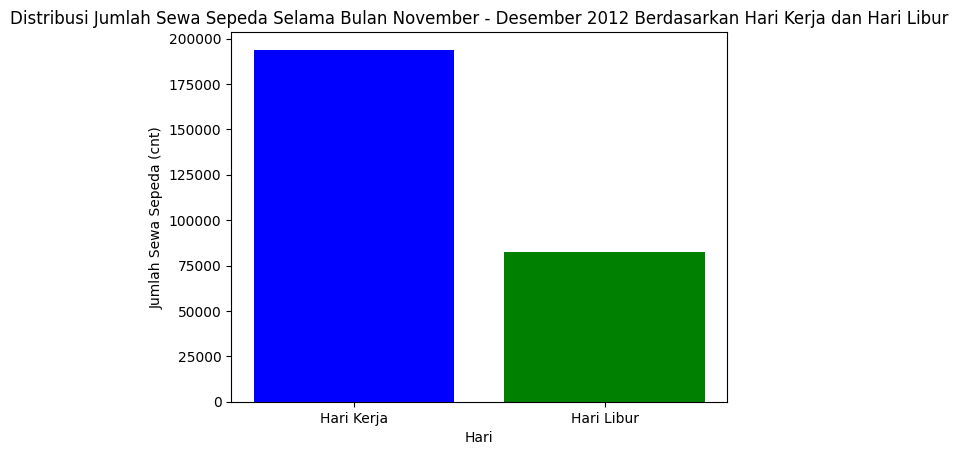

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya, Anda memiliki data dalam bentuk dictionary
data_hour = pd.read_csv("hour.csv")
data_day = pd.read_csv("day.csv")

# Buat DataFrame dari dictionary data
df_hour = pd.DataFrame(data_hour)
df_day = pd.DataFrame(data_day)

# Filter data untuk bulan November - Desember tahun 2012
nov_dec_data = df_day[(df_day['dteday'].str.startswith('2012-11')) | (df_day['dteday'].str.startswith('2012-12'))]

# Pisahkan data menjadi hari kerja dan hari libur
weekday_data = nov_dec_data[nov_dec_data['workingday'] == 1]
holiday_data = nov_dec_data[nov_dec_data['workingday'] == 0]

# Hitung jumlah sewa sepeda untuk setiap hari
weekday_cnt = weekday_data['cnt'].sum()
holiday_cnt = holiday_data['cnt'].sum()

# Buat visualisasi
labels = ['Hari Kerja', 'Hari Libur']
counts = [weekday_cnt, holiday_cnt]

plt.bar(labels, counts, color=['blue', 'green'])
plt.title('Distribusi Jumlah Sewa Sepeda Selama Bulan November - Desember 2012 Berdasarkan Hari Kerja dan Hari Libur')
plt.xlabel('Hari')
plt.ylabel('Jumlah Sewa Sepeda (cnt)')
plt.show()

#### Insight:



*   Distribusi jumlah sewa sepeda bisa memberikan gambaran tentang pola peminjaman sepeda pada hari kerja dan hari libur.
*   Memahami perbedaan dalam jumlah sewa sepeda antara hari kerja dan hari libur dapat membantu dalam merencanakan layanan atau promosi khusus untuk masing-masing jenis hari.

### Pertanyaan 2 : Bagaimana tingkat kelembaban mempengaruhi jumlah sewa sepeda selama musim dingin?

In [20]:
import plotly.express as px

# Filter musim gugur (season 3)
filtered_data = df_day[df_day["season"] == 4]

# Buat plot dengan Plotly untuk menganalisis pengaruh cuaca terhadap jumlah sewa sepeda
fig = px.bar(filtered_data, x="hum", y="cnt", title="Pengaruh Kelembaban terhadap Jumlah Sewa Sepeda (Musim Dingin)")
fig.update_xaxes(title="Kelembaban (hum)")
fig.update_yaxes(title="Jumlah Sewa Sepeda (cnt)")

# Tampilkan plot
fig.show()

#### Insight:



*   Analisis ini dapat membantu dalam memahami bagaimana faktor cuaca, seperti tingkat kelembaban, mempengaruhi minat masyarakat dalam menggunakan layanan sewa sepeda.

*   Mengetahui hubungan antara tingkat kelembaban dan jumlah sewa sepeda dapat membantu dalam menentukan strategi pengelolaan stok atau penjadwalan perawatan.

### Pertanyaan 3 : Apa hubungan cuaca dengan jumlah pengguna yang terdaftar?

In [21]:
# Buat scatter plot dengan Plotly untuk memvisualisasikan hubungan cuaca dengan jumlah pengguna terdaftar
fig = px.scatter(df_day, x="weathersit", y="registered", title="Hubungan Cuaca dengan Jumlah Pengguna Terdaftar")
fig.update_xaxes(title="Cuaca (weathersit)")
fig.update_yaxes(title="Jumlah Pengguna Terdaftar")
st.plotly_chart(fig)


2024-03-04 08:33:51.226 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

#### Insight :


*   Memahami hubungan antara cuaca dan jumlah pengguna yang terdaftar dapat memberikan wawasan tentang faktor-faktor eksternal yang mempengaruhi minat pengguna dalam mendaftar sebagai anggota layanan sepeda.

*   Analisis ini dapat membantu dalam mengidentifikasi tren pendaftaran pengguna yang terkait dengan perubahan cuaca dan mengoptimalkan strategi pemasaran atau promosi.


### Pertanyaan 4 : "Berapa jumlah total sewa sepeda untuk tahun 2012 selama musim gugur dan dingin?"

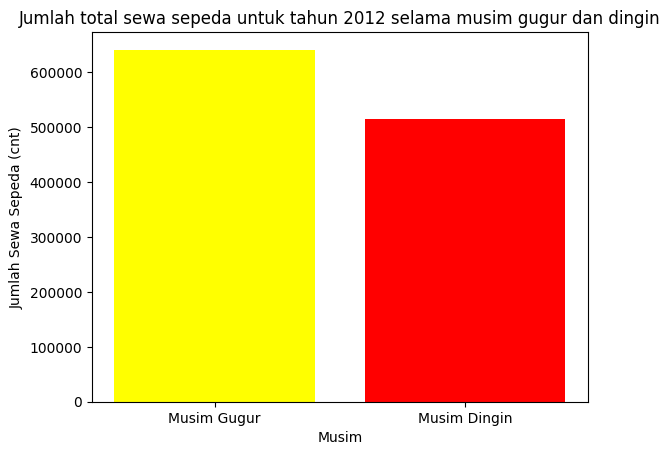

In [35]:
# Filter data untuk tahun 2012 selama musim gugur (season 3) dan musim dingin (season 4)
autumn_winter_data = df_day[(df_day['yr'] == 1) & ((df_day['season'] == 3) | (df_day['season'] == 4))]

autumn_total_data = autumn_winter_data[autumn_winter_data['season'] == 3]
winter_total_data = autumn_winter_data[autumn_winter_data['season'] == 4]

# Hitung jumlah total sewa sepeda untuk musim gugur dan dingin
autumn_total_cnt = autumn_total_data['cnt'].sum()
winter_total_cnt = winter_total_data['cnt'].sum()

# Buat visualisasi
labels = ['Musim Gugur', 'Musim Dingin']
counts = [autumn_total_cnt, winter_total_cnt]

plt.bar(labels, counts, color=['yellow', 'red'])
plt.title('Jumlah total sewa sepeda untuk tahun 2012 selama musim gugur dan dingin')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa Sepeda (cnt)')
plt.show()

## Conclusion

1. Bagaimana distribusi jumlah sewa sepeda berdasarkan hari kerja dan hari libur selama bulan November - Desember tahun 2012?
- Pada bulan November - Desember 2012,
terdapat perbedaan distribusi jumlah sewa sepeda antara hari kerja dan hari libur.
- Jumlah sewa sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur.
2. Bagaimana tingkat kelembaban mempengaruhi jumlah sewa sepeda selama musim dingin?
- Analisis menunjukkan bahwa tidak ada pola tren yang jelas antara tingkat kelembaban dan jumlah sewa sepeda selama musim dingin.
3. Apa hubungan cuaca dengan jumlah pengguna yang terdaftar?
- Dapat disimpulkan bahwa keputusan untuk mendaftar tidak secara signifikan dipengaruhi oleh faktor cuaca yang mungkin lebih memengaruhi penggunaan sepeda secara langsung.
4. Berapa jumlah total sewa sepeda untuk tahun 2012 selama musim gugur dan dingin?
- Total sewa sepeda selama musim gugur dan dingin di tahun 2012 menunjukkan angka tertentu.
- Informasi ini dapat digunakan untuk merencanakan kebutuhan stok, perawatan, dan layanan tambahan selama musim dengan permintaan tinggi.